#### Scatterplot

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

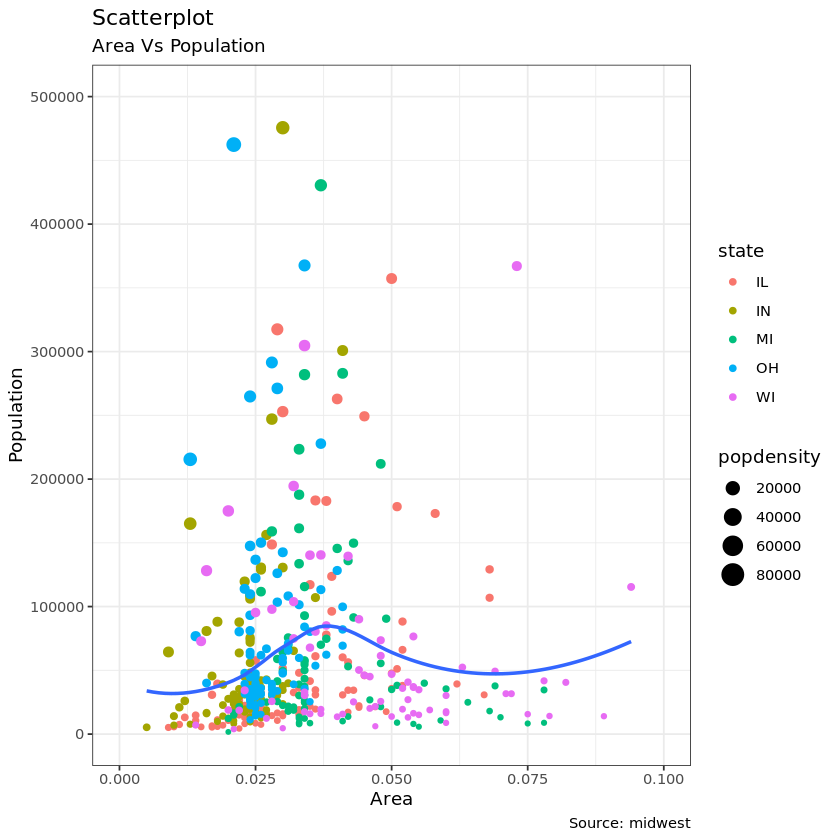

In [1]:
# install.packages("ggplot2")
# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

#### Scatterplot With Encircling

In [2]:
# install.packages("ggalt")
# sudo apt install -y libproj-dev
# devtools::install_github("hrbrmstr/ggalt")

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2
Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

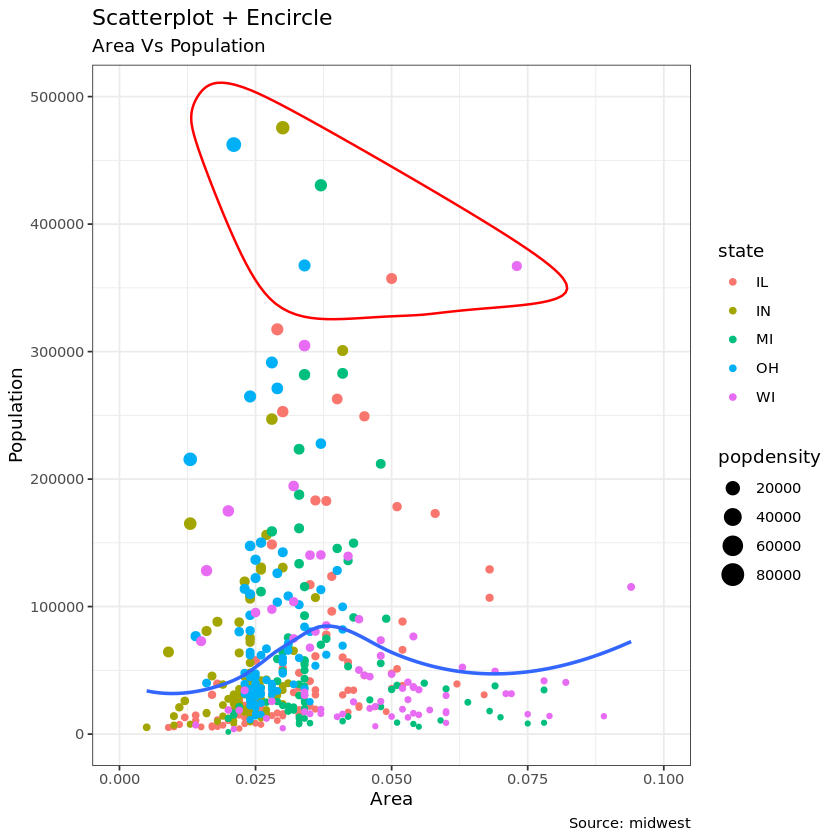

In [25]:
options(scipen = 999)
library(ggplot2)
library(ggalt)
midwest_select <- midwest[midwest$poptotal > 350000 & 
                            midwest$poptotal <= 500000 & 
                            midwest$area > 0.01 & 
                            midwest$area < 0.1, ]

# Plot
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) +   # draw points
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) +   # draw smoothing line
  geom_encircle(aes(x=area, y=poptotal), 
                data=midwest_select, 
                color="red", 
                size=2, 
                expand=0.08) +   # encircle
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot + Encircle", 
       caption="Source: midwest")

#### Bubblechart

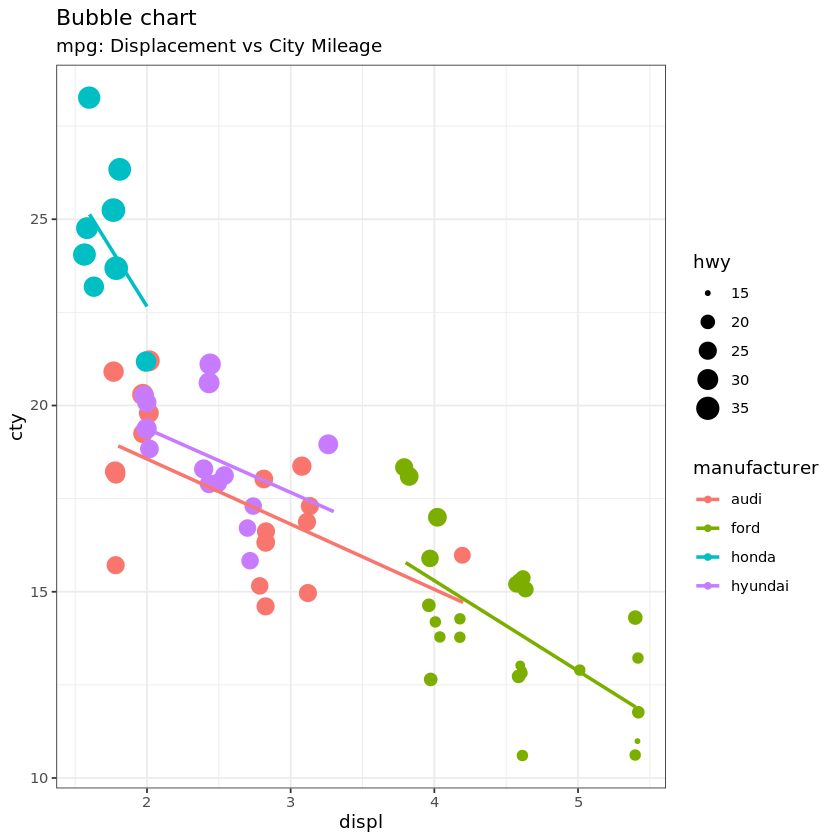

In [4]:
# load package and data
library(ggplot2)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"), ]

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
g <- ggplot(mpg_select, aes(displ, cty)) + 
  labs(subtitle="mpg: Displacement vs City Mileage",
       title="Bubble chart")

g + geom_jitter(aes(col=manufacturer, size=hwy)) + 
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

#### Correlogram

In [7]:
#install.packages("ggcorrplot")

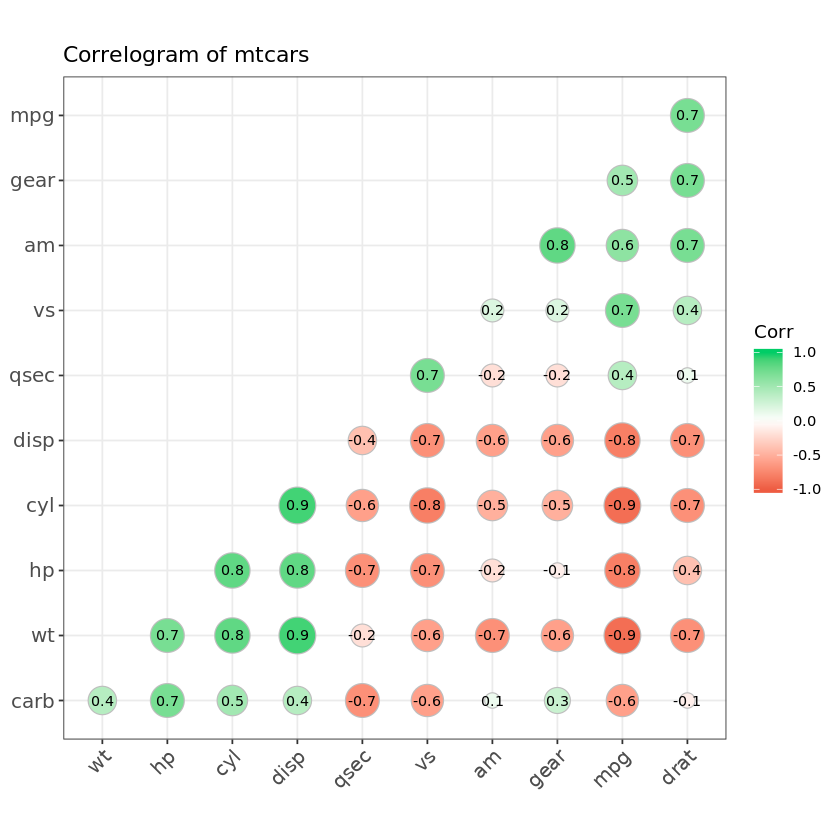

In [8]:
# devtools::install_github("kassambara/ggcorrplot")
library(ggplot2)
library(ggcorrplot)

# Correlation matrix
data(mtcars)
corr <- round(cor(mtcars), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of mtcars", 
           ggtheme=theme_bw)

#### Histogram

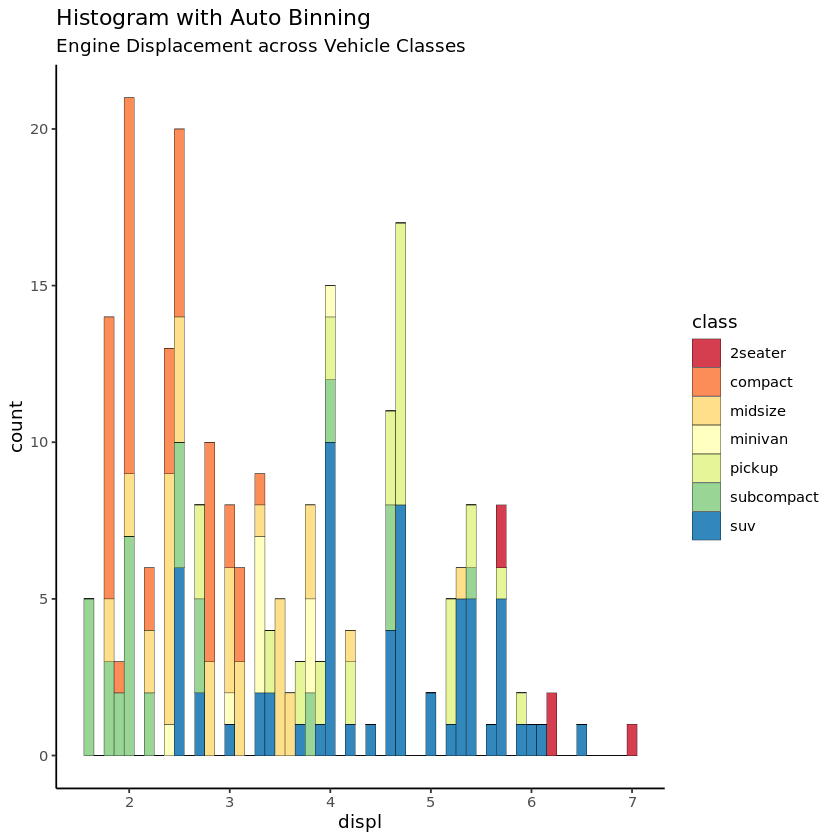

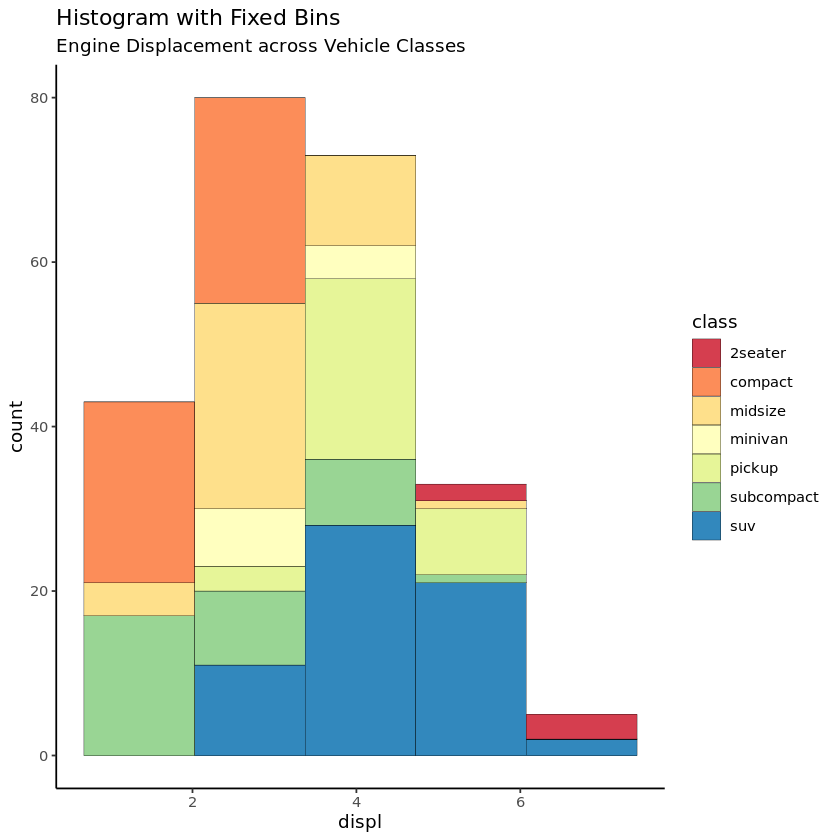

In [9]:
library(ggplot2)
theme_set(theme_classic())

# Histogram on a Continuous (Numeric) Variable
g <- ggplot(mpg, aes(displ)) + scale_fill_brewer(palette = "Spectral")

g + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning", 
       subtitle="Engine Displacement across Vehicle Classes")  

g + geom_histogram(aes(fill=class), 
                   bins=5, 
                   col="black", 
                   size=.1) +   # change number of bins
  labs(title="Histogram with Fixed Bins", 
       subtitle="Engine Displacement across Vehicle Classes") 

#### Population Pyramid


In [10]:
#install.packages("ggthemes")

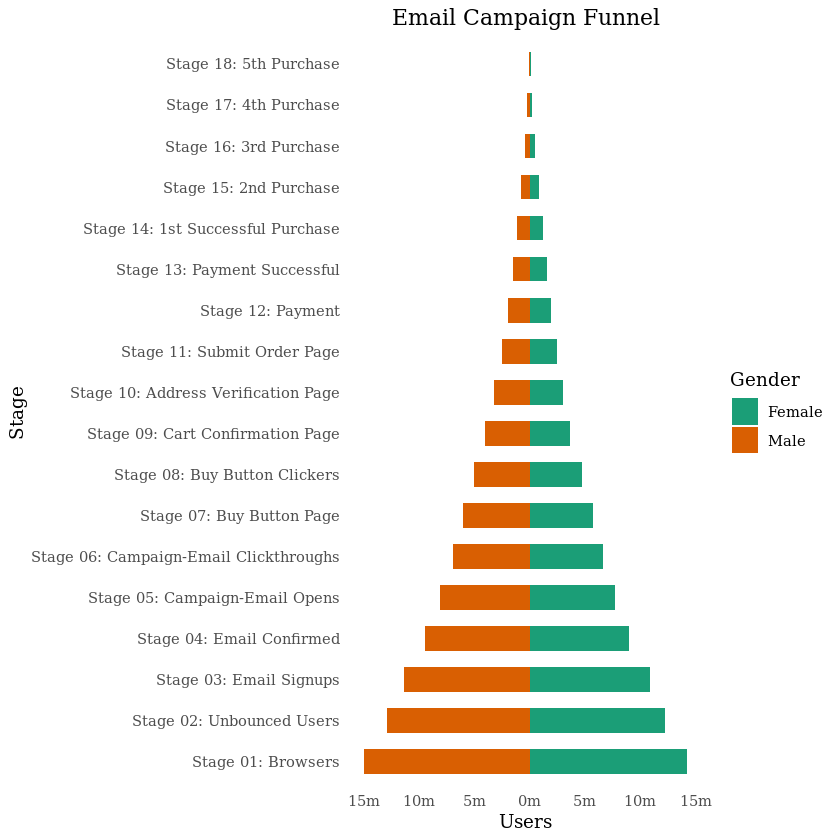

In [11]:
library(ggplot2)
library(ggthemes)
options(scipen = 999)  # turns of scientific notations like 1e+40

# Read data
email_campaign_funnel <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# X Axis Breaks and Labels 
brks <- seq(-15000000, 15000000, 5000000)
lbls = paste0(as.character(c(seq(15, 0, -5), seq(5, 15, 5))), "m")

# Plot
ggplot(email_campaign_funnel, aes(x = Stage, y = Users, fill = Gender)) +   # Fill column
                              geom_bar(stat = "identity", width = .6) +   # draw the bars
                              scale_y_continuous(breaks = brks,   # Breaks
                                                 labels = lbls) + # Labels
                              coord_flip() +  # Flip axes
                              labs(title="Email Campaign Funnel") +
                              theme_tufte() +  # Tufte theme from ggfortify
                              theme(plot.title = element_text(hjust = .5), 
                                    axis.ticks = element_blank()) +   # Centre plot title
                              scale_fill_brewer(palette = "Dark2")  # Color palette

#### Waffle Chart

var
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         2         20         18          5         14         15         26 

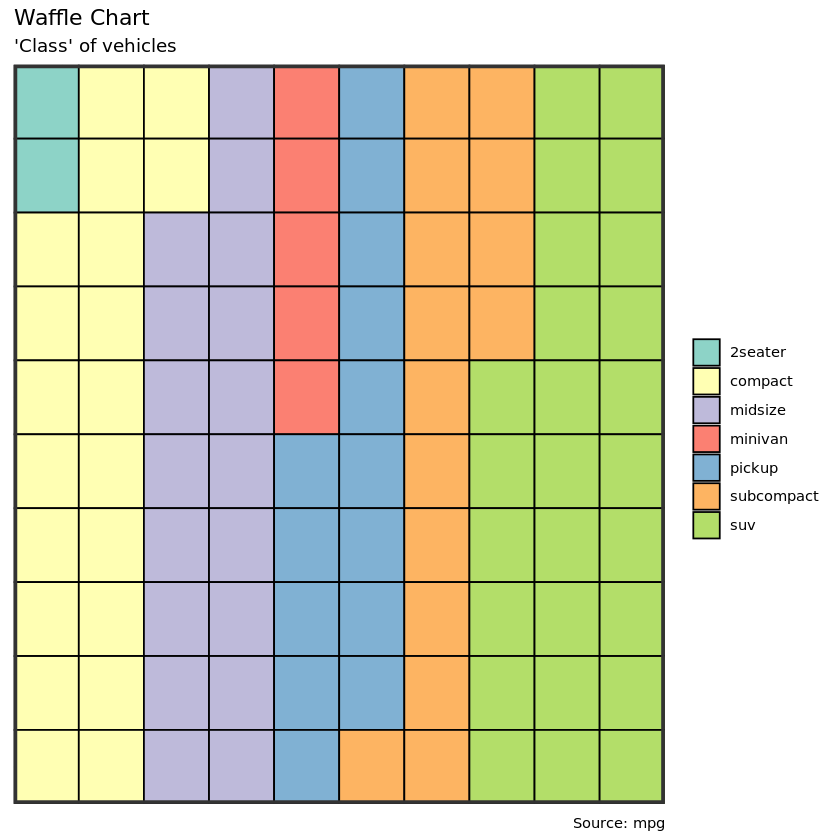

In [27]:
var <- mpg$class  # the categorical data 

## Prep data (nothing to change here)
nrows <- 10
df <- expand.grid(y = 1:nrows, x = 1:nrows)
categ_table <- round(table(var) * ((nrows*nrows)/(length(var))))
categ_table
#>   2seater    compact    midsize    minivan     pickup subcompact        suv 
#>         2         20         18          5         14         15         26 

df$category <- factor(rep(names(categ_table), categ_table))  
# NOTE: if sum(categ_table) is not 100 (i.e. nrows^2), it will need adjustment to make the sum to 100.

## Plot
ggplot(df, aes(x = x, y = y, fill = category)) + 
        geom_tile(color = "black", size = 0.5) +
        scale_x_continuous(expand = c(0, 0)) +
        scale_y_continuous(expand = c(0, 0), trans = 'reverse') +
        scale_fill_brewer(palette = "Set3") +
        labs(title="Waffle Chart", subtitle="'Class' of vehicles",
             caption="Source: mpg") + 
        theme(panel.border = element_rect(size = 2),
              plot.title = element_text(size = rel(1.2)),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks = element_blank(),
              legend.title = element_blank(),
              legend.position = "right")

#### Stacked Area Chart


In [ ]:
#install.packages("lubridate")

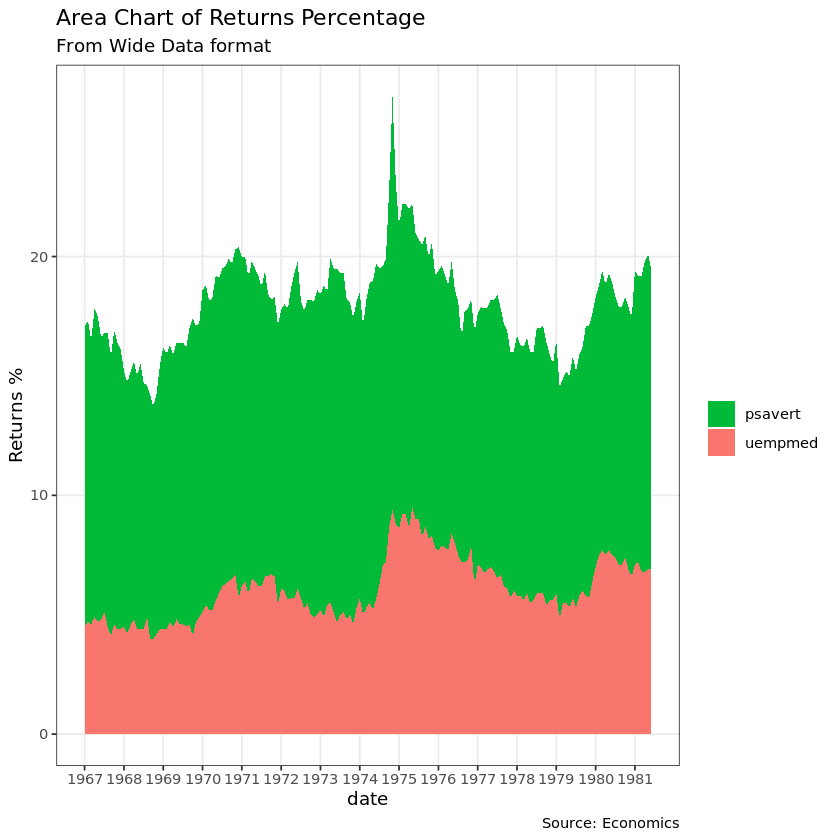

In [28]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

df <- economics[, c("date", "psavert", "uempmed")]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_area(aes(y=psavert+uempmed, fill="psavert")) + 
  geom_area(aes(y=uempmed, fill="uempmed")) + 
  labs(title="Area Chart of Returns Percentage", 
       subtitle="From Wide Data format", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_fill_manual(name="", 
                    values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(panel.grid.minor = element_blank())  # turn off minor grid

#### Calendar Heatmap


Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



year,yearmonthf,monthf,week,monthweek,weekdayf,VIX.Close
<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>
2012,Jan 2012,Jan,1,1,Tue,22.97
2012,Jan 2012,Jan,1,1,Wed,22.22
2012,Jan 2012,Jan,1,1,Thu,21.48
2012,Jan 2012,Jan,1,1,Fri,20.63
2012,Jan 2012,Jan,2,2,Mon,21.07
2012,Jan 2012,Jan,2,2,Tue,20.69


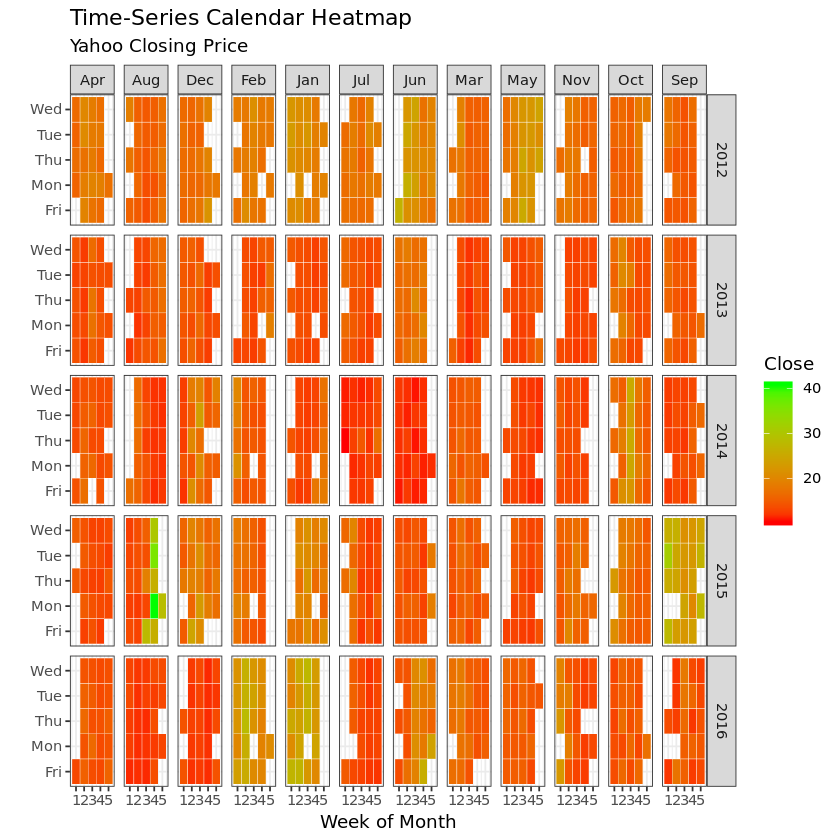

In [17]:
# http://margintale.blogspot.in/2012/04/ggplot2-time-series-heatmaps.html
library(ggplot2)
library(plyr)
library(scales)
library(zoo)

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")
df$date <- as.Date(df$date)  # format date
df <- df[df$year >= 2012, ]  # filter reqd years

# Create Month Week
df$yearmonth <- as.yearmon(df$date)
df$yearmonthf <- factor(df$yearmonth)
df <- ddply(df,.(yearmonthf), transform, monthweek=1+week-min(week))  # compute week number of month
df <- df[, c("year", "yearmonthf", "monthf", "week", "monthweek", "weekdayf", "VIX.Close")]
head(df)
#>   year yearmonthf monthf week monthweek weekdayf VIX.Close
#> 1 2012   Jan 2012    Jan    1         1      Tue     22.97
#> 2 2012   Jan 2012    Jan    1         1      Wed     22.22
#> 3 2012   Jan 2012    Jan    1         1      Thu     21.48
#> 4 2012   Jan 2012    Jan    1         1      Fri     20.63
#> 5 2012   Jan 2012    Jan    2         2      Mon     21.07
#> 6 2012   Jan 2012    Jan    2         2      Tue     20.69


# Plot
ggplot(df, aes(monthweek, weekdayf, fill = VIX.Close)) + 
  geom_tile(colour = "white") + 
  facet_grid(year~monthf) + 
  scale_fill_gradient(low="red", high="green") +
  labs(x="Week of Month",
       y="",
       title = "Time-Series Calendar Heatmap", 
       subtitle="Yahoo Closing Price", 
       fill="Close")

#### Slope Chart


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2


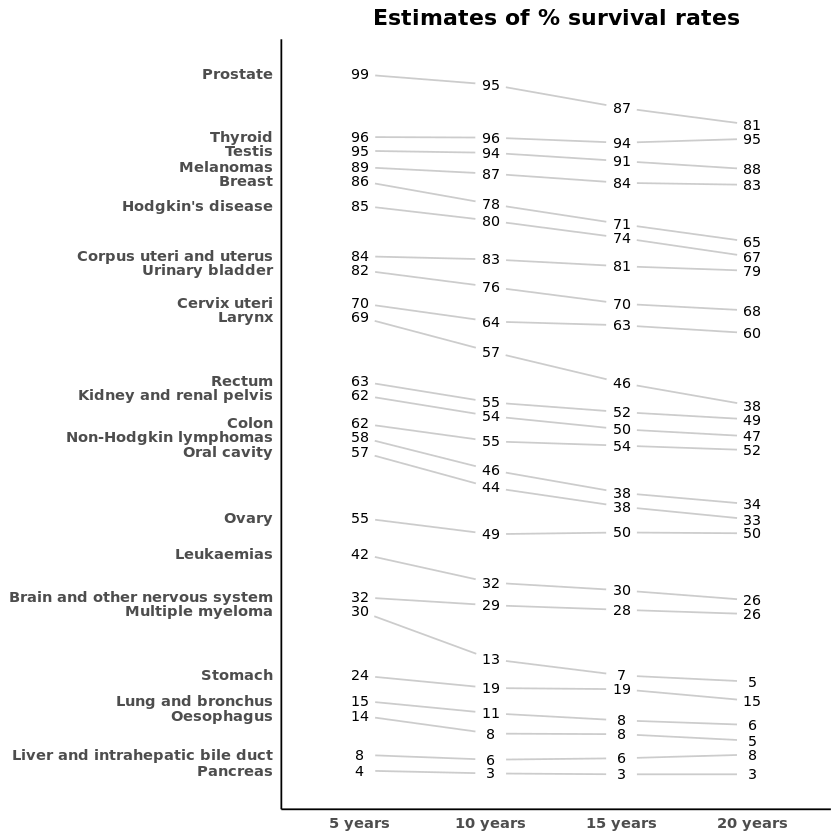

In [18]:
library(dplyr)
theme_set(theme_classic())
source_df <- read.csv("https://raw.githubusercontent.com/jkeirstead/r-slopegraph/master/cancer_survival_rates.csv")

# Define functions. Source: https://github.com/jkeirstead/r-slopegraph
tufte_sort <- function(df, x="year", y="value", group="group", method="tufte", min.space=0.05) {
    ## First rename the columns for consistency
    ids <- match(c(x, y, group), names(df))
    df <- df[,ids]
    names(df) <- c("x", "y", "group")

    ## Expand grid to ensure every combination has a defined value
    tmp <- expand.grid(x=unique(df$x), group=unique(df$group))
    tmp <- merge(df, tmp, all.y=TRUE)
    df <- mutate(tmp, y=ifelse(is.na(y), 0, y))
  
    ## Cast into a matrix shape and arrange by first column
    require(reshape2)
    tmp <- dcast(df, group ~ x, value.var="y")
    ord <- order(tmp[,2])
    tmp <- tmp[ord,]
    
    min.space <- min.space*diff(range(tmp[,-1]))
    yshift <- numeric(nrow(tmp))
    ## Start at "bottom" row
    ## Repeat for rest of the rows until you hit the top
    for (i in 2:nrow(tmp)) {
        ## Shift subsequent row up by equal space so gap between
        ## two entries is >= minimum
        mat <- as.matrix(tmp[(i-1):i, -1])
        d.min <- min(diff(mat))
        yshift[i] <- ifelse(d.min < min.space, min.space - d.min, 0)
    }

    
    tmp <- cbind(tmp, yshift=cumsum(yshift))

    scale <- 1
    tmp <- melt(tmp, id=c("group", "yshift"), variable.name="x", value.name="y")
    ## Store these gaps in a separate variable so that they can be scaled ypos = a*yshift + y

    tmp <- transform(tmp, ypos=y + scale*yshift)
    return(tmp)
   
}

plot_slopegraph <- function(df) {
    ylabs <- subset(df, x==head(x,1))$group
    yvals <- subset(df, x==head(x,1))$ypos
    fontSize <- 3
    gg <- ggplot(df,aes(x=x,y=ypos)) +
        geom_line(aes(group=group),colour="grey80") +
        geom_point(colour="white",size=8) +
        geom_text(aes(label=y), size=fontSize, family="American Typewriter") +
        scale_y_continuous(name="", breaks=yvals, labels=ylabs)
    return(gg)
}    

## Prepare data    
df <- tufte_sort(source_df, 
                 x="year", 
                 y="value", 
                 group="group", 
                 method="tufte", 
                 min.space=0.05)

df <- transform(df, 
                x=factor(x, levels=c(5,10,15,20), 
                            labels=c("5 years","10 years","15 years","20 years")), 
                y=round(y))

## Plot
plot_slopegraph(df) + labs(title="Estimates of % survival rates") + 
                      theme(axis.title=element_blank(),
                            axis.ticks = element_blank(),
                            plot.title = element_text(hjust=0.5,
                                                      family = "American Typewriter",
                                                      face="bold"),
                            axis.text = element_text(family = "American Typewriter",
                                                     face="bold"))


#### Seasonal Plot

In [ ]:
#install.packages("forecast")

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


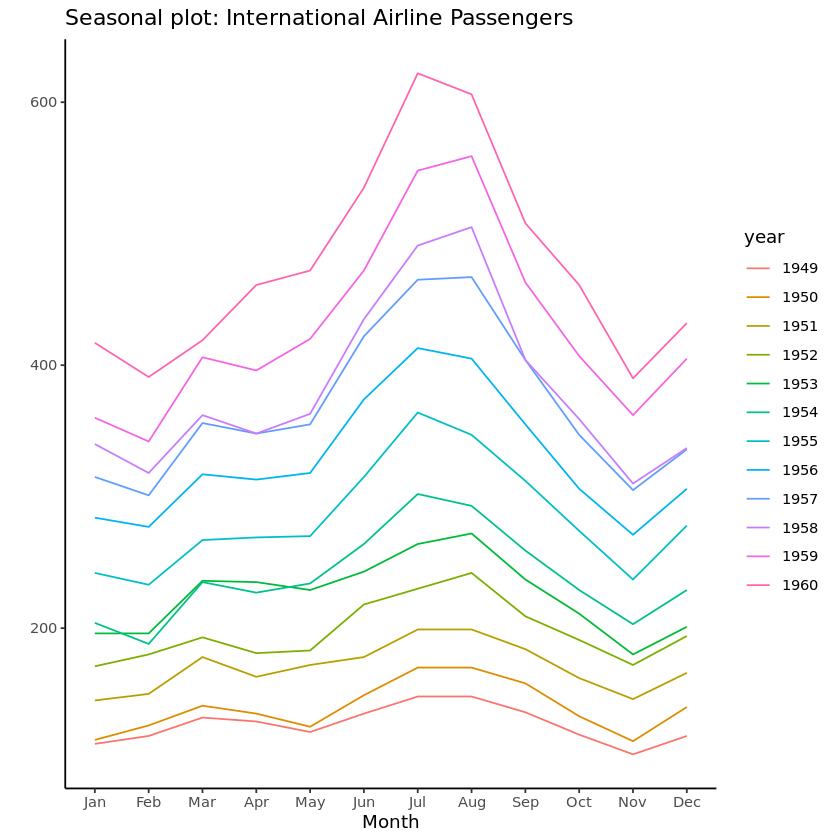

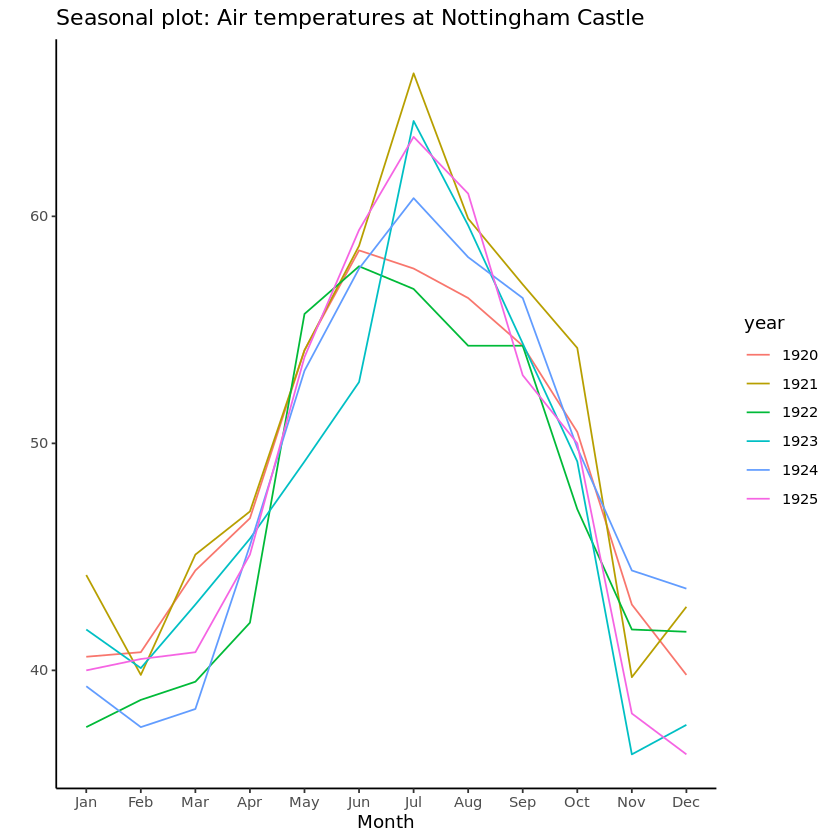

In [20]:
library(ggplot2)
library(forecast)
theme_set(theme_classic())

# Subset data
nottem_small <- window(nottem, start=c(1920, 1), end=c(1925, 12))  # subset a smaller timewindow

# Plot
ggseasonplot(AirPassengers) + labs(title="Seasonal plot: International Airline Passengers")
ggseasonplot(nottem_small) + labs(title="Seasonal plot: Air temperatures at Nottingham Castle")

#### Groups

In [ ]:
#install.packages("ggdendro")

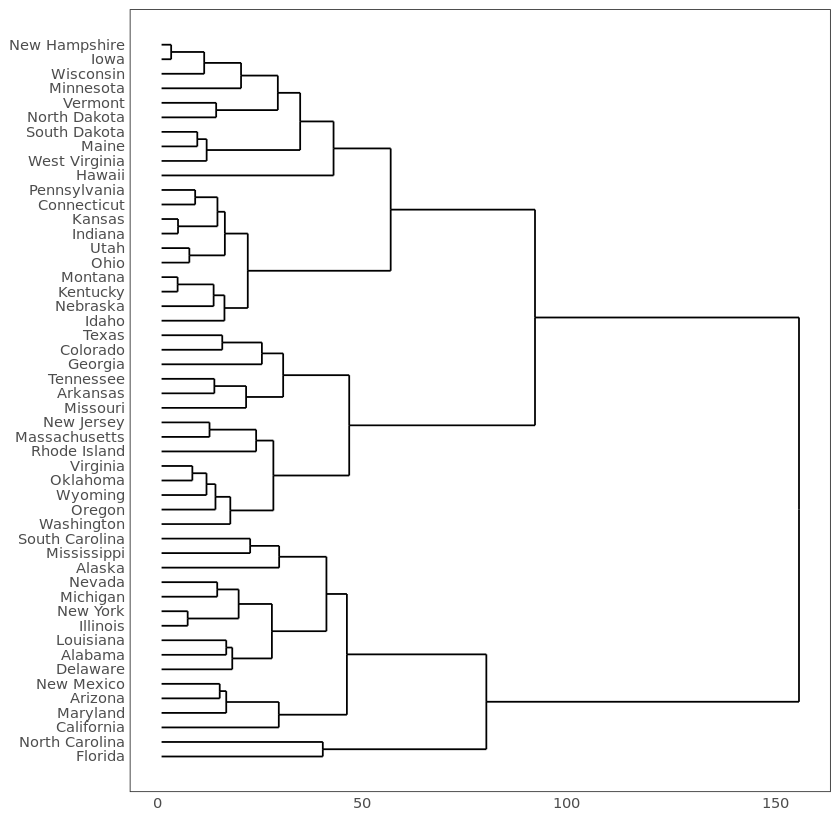

In [21]:
# install.packages("ggdendro")
library(ggplot2)
library(ggdendro)
theme_set(theme_bw())

hc <- hclust(dist(USArrests), "ave")  # hierarchical clustering

# plot
ggdendrogram(hc, rotate = TRUE, size = 2)

#### Clusters

In [ ]:
# install.packages('devtools')
# install.packages('ggfortify')


In [ ]:
# sudo apt install -y libcurl4-gnutls-dev
# sudo apt install -y libxml2-dev

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.table          ggalt   
  fortify.ts             forecast
  residuals.ar           forecast


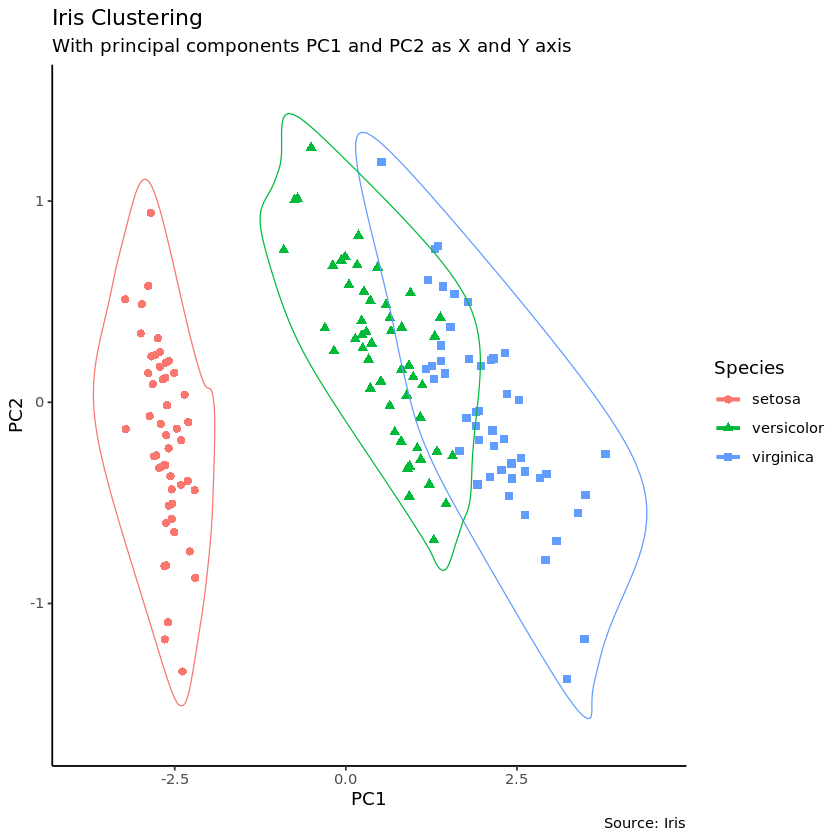

In [30]:
# devtools::install_github("hrbrmstr/ggalt")
library(ggplot2)
library(ggalt)
library(ggfortify)
theme_set(theme_classic())

# Compute data with principal components ------------------
df <- iris[c(1, 2, 3, 4)]
pca_mod <- prcomp(df)  # compute principal components

# Data frame of principal components ----------------------
df_pc <- data.frame(pca_mod$x, Species=iris$Species)  # dataframe of principal components
df_pc_vir <- df_pc[df_pc$Species == "virginica", ]  # df for 'virginica'
df_pc_set <- df_pc[df_pc$Species == "setosa", ]  # df for 'setosa'
df_pc_ver <- df_pc[df_pc$Species == "versicolor", ]  # df for 'versicolor'
 
# Plot ----------------------------------------------------
ggplot(df_pc, aes(PC1, PC2, col=Species)) + 
  geom_point(aes(shape=Species), size=2) +   # draw points
  labs(title="Iris Clustering", 
       subtitle="With principal components PC1 and PC2 as X and Y axis",
       caption="Source: Iris") + 
  coord_cartesian(xlim = 1.2 * c(min(df_pc$PC1), max(df_pc$PC1)), 
                  ylim = 1.2 * c(min(df_pc$PC2), max(df_pc$PC2))) +   # change axis limits
  geom_encircle(data = df_pc_vir, aes(x=PC1, y=PC2)) +   # draw circles
  geom_encircle(data = df_pc_set, aes(x=PC1, y=PC2)) + 
  geom_encircle(data = df_pc_ver, aes(x=PC1, y=PC2))